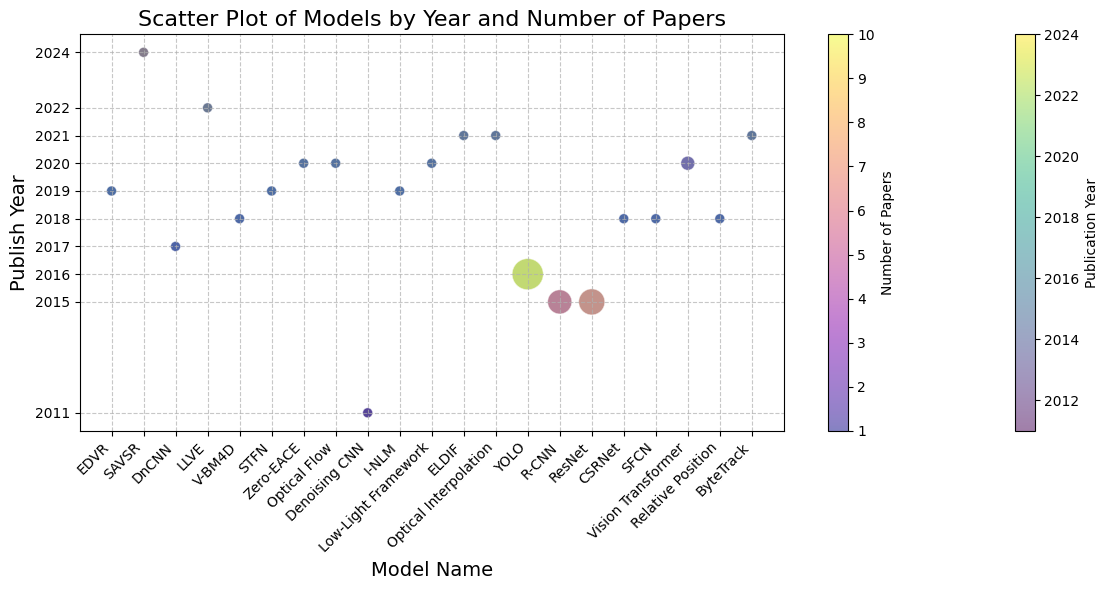

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data with shorter model names
data = {
    'Model': [
        'EDVR', 'SAVSR', 'DnCNN', 'LLVE',  # Low-Light Video Enhancement
        'V-BM4D',  # Enhanced Video Block Matching Four-Dimensional Denoising
        'STFN',  # Spatio-Temporal Fusion Network
        'Zero-EACE',  # Zero-Reference Exposure Adjusting Curve Estimation
        'Optical Flow',  # Joint Training of Video Denoising and Optical Flow Estimation Networks
        'Denoising CNN',  # Denoising Autoencoder with Convolutional Neural Networks
        'I-NLM',  # Improved Non-Local Means Denoising Algorithm
        'Low-Light Framework',  # Low-Light Image Enhancement Framework
        'ELDIF',  # Elevated Learning based Dynamic Image Filter
        'Optical Interpolation',  # Optical Flow-Based Frame Interpolation and Extrapolation
        'YOLO', 'R-CNN', 'ResNet', 'CSRNet', 
        'SFCN',  # Single Frame Convolutional Network
        'Vision Transformer', 
        'Relative Position',  # Relative Position Embeddings
        'ByteTrack'  # ByteTrack (tracking)
    ],
    'Year': [
        2019, 2024, 2017, 2022, 
        2018, 2019, 2020, 2020, 
        2011, 2019, 2020, 2021, 
        2021, 2016, 2015, 2015, 
        2018, 2018, 2020, 2018, 
        2021
    ],
    'Number_of_Papers': [
        1, 1, 1, 1, 
        1, 1, 1, 1, 
        1, 1, 1, 1, 
        1, 10, 6, 7, 
        1, 1, 2, 1, 
        1
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot with enhancements
plt.figure(figsize=(12, 6))

# Create the scatter plot for publication year
scatter_year = plt.scatter(
    x=df['Model'], 
    y=df['Year'], 
    s=df['Number_of_Papers'] * 50,  # Size of points based on the number of papers
    alpha=0.5, 
    c=df['Year'],  # Color points based on year
    cmap='viridis',  # Color map for publication year
    edgecolors='w', 
    linewidth=0.5
)

# Add color bar for Year
cbar_year = plt.colorbar(scatter_year)
cbar_year.set_label('Publication Year')

# Create a separate scatter plot for Number of Papers
scatter_papers = plt.scatter(
    x=df['Model'],
    y=df['Year'],
    s=df['Number_of_Papers'] * 50,  # Size of points based on the number of papers
    c=df['Number_of_Papers'],  # Color points based on the number of papers (original values)
    cmap='plasma',  # Color map for number of papers
    alpha=0.5,
    edgecolors='w',
    linewidth=0.5
)

# Add color bar for the number of papers
cbar_papers = plt.colorbar(scatter_papers)
cbar_papers.set_label('Number of Papers')

# Adding titles and labels
plt.title('Scatter Plot of Models by Year and Number of Papers', fontsize=16)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Publish Year', fontsize=14)

# Set Y-ticks to show all unique years
plt.yticks(sorted(df['Year'].unique()))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


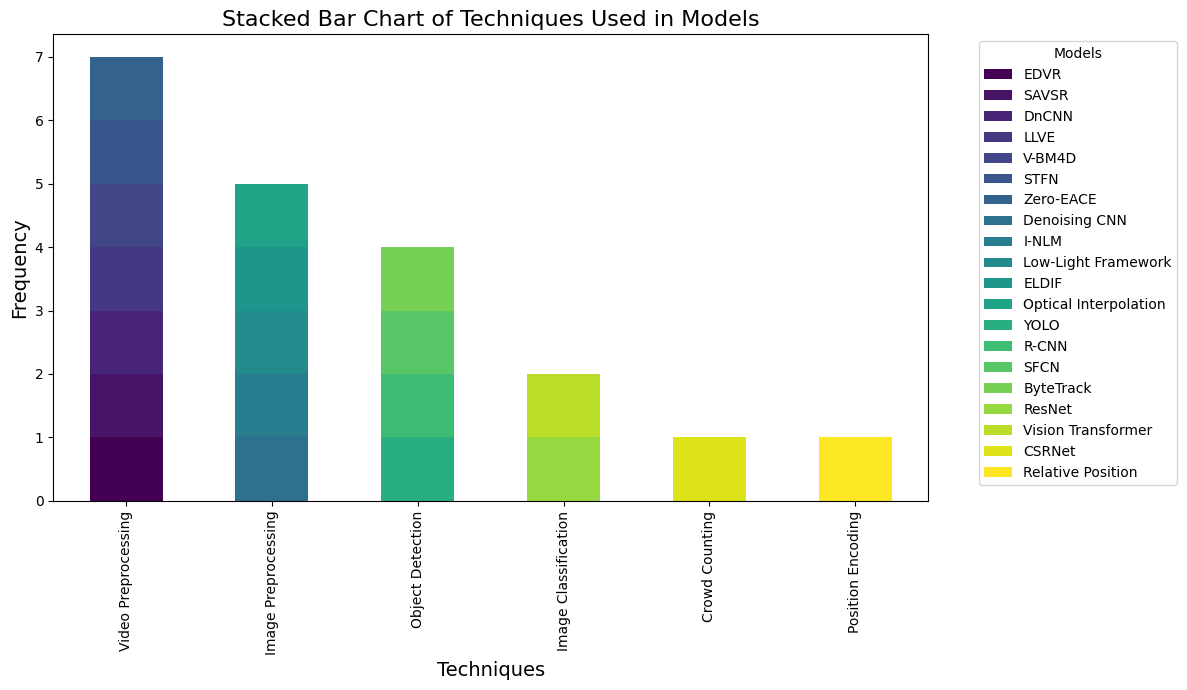

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
data = {
    'Model': [
        'EDVR', 'SAVSR', 'DnCNN', 'LLVE',  
        'V-BM4D',  
        'STFN',  
        'Zero-EACE',  
        'Optical Flow',  
        'Denoising CNN',  
        'I-NLM',  
        'Low-Light Framework',  
        'ELDIF',  
        'Optical Interpolation',  
        'YOLO', 'R-CNN', 'ResNet', 'CSRNet', 
        'SFCN',  
        'Vision Transformer',  
        'Relative Position',  
        'ByteTrack'  
    ],
    'Year': [
        2019, 2024, 2017, 2022, 
        2018, 2019, 2020, 2020, 
        2011, 2019, 2020, 2021, 
        2021, 2016, 2015, 2015, 
        2018, 2018, 2020, 2018, 
        2021
    ],
    'Number_of_Papers': [
        1, 1, 1, 1, 
        1, 1, 1, 1, 
        1, 1, 1, 1, 
        1, 10, 6, 7, 
        1, 1, 2, 1, 
        1
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define model techniques and group them into broader categories
technique_mapping = {
    'EDVR': 'Video Preprocessing',
    'SAVSR': 'Video Preprocessing',  # Grouped under Video Enhancement
    'DnCNN': 'Video Preprocessing',
    'LLVE': 'Video Preprocessing',
    'V-BM4D': 'Video Preprocessing',
    'STFN': 'Video Preprocessing',
    'Zero-EACE': 'Video Preprocessing',
    'Joint Training': 'Video Preprocessing',  # Adjusted for clarity
    'Denoising CNN': 'Image Preprocessing',
    'I-NLM': 'Image Preprocessing',
    'Low-Light Framework': 'Image Preprocessing',
    'ELDIF': 'Image Preprocessing',
    'Optical Interpolation': 'Image Preprocessing',  # Adjusted category
    'YOLO': 'Object Detection',
    'R-CNN': 'Object Detection',
    'ResNet': 'Image Classification',
    'CSRNet': 'Crowd Counting',
    'SFCN': 'Object Detection',
    'Vision Transformer': 'Image Classification',
    'Relative Position': 'Position Encoding',  # Adjusted for accuracy
    'ByteTrack': 'Object Detection'
}


# Create a new column for techniques
df['Technique'] = df['Model'].map(technique_mapping)

# Count frequency of each technique within their categories
technique_counts = df.groupby(['Technique']).size().reset_index(name='Count')

categories = ['Video Preprocessing', 'Image Preprocessing', 
              'Object Detection', 'Image Classification', 'Crowd Counting', 
              'Position Encoding']

# Initialize a DataFrame to hold the stack data
stacked_data = pd.DataFrame(index=categories)

# Populate the DataFrame with counts
for category in categories:
    models_in_category = df[df['Technique'] == category]['Model']
    for model in models_in_category:
        count = df[df['Model'] == model].shape[0]
        if category in stacked_data.index:
            stacked_data.loc[category, model] = count
        else:
            stacked_data.loc[category, model] = count

# Fill NaN values with 0
stacked_data.fillna(0, inplace=True)

# Create a color map for each technique
colors = plt.cm.viridis(np.linspace(0, 1, len(stacked_data.columns)))

# Initialize the bar chart
plt.figure(figsize=(12, 7))

# Create a stacked bar for each category
stacked_data.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

# Adding titles and labels
plt.title('Stacked Bar Chart of Techniques Used in Models', fontsize=16)
plt.xlabel('Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the legend
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


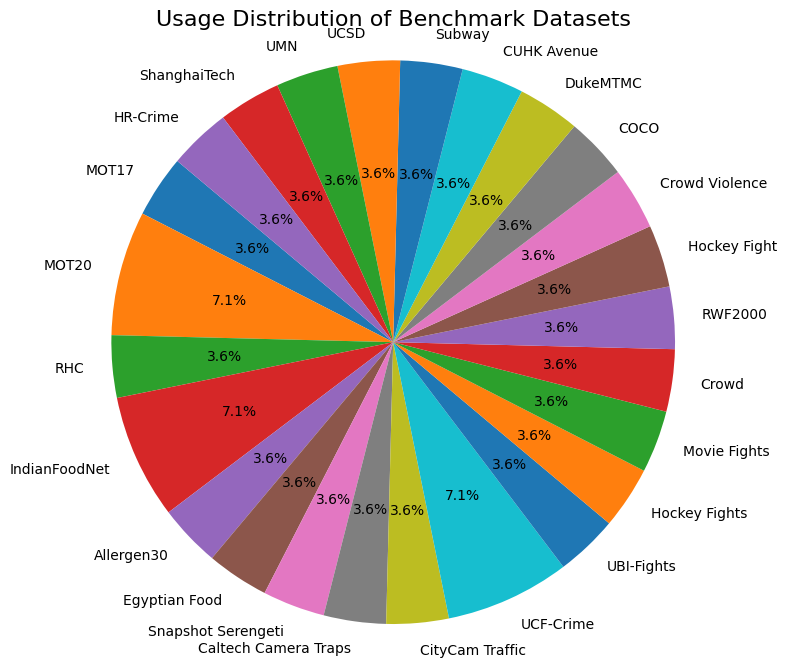

In [80]:
import matplotlib.pyplot as plt

# Define datasets and their usage counts
datasets_count = {
    "MOT17": 1,
    "MOT20": 2,
    "RHC": 1,
    "IndianFoodNet": 2,
    "Allergen30": 1,
    "Egyptian Food": 1,
    "Snapshot Serengeti": 1,
    "Caltech Camera Traps": 1,
    "CityCam Traffic": 1,
    "UCF-Crime": 2,
    "UBI-Fights": 1,
    "Hockey Fights": 1,
    "Movie Fights": 1,
    "Crowd": 1,
    "RWF2000": 1,
    "Hockey Fight": 1,
    "Crowd Violence": 1,
    "COCO": 1,
    "DukeMTMC": 1,
    "CUHK Avenue": 1,
    "Subway": 1,
    "UCSD": 1,
    "UMN": 1,
    "ShanghaiTech": 1,
    "HR-Crime": 1
}

# Prepare data for pie chart
datasets = list(datasets_count.keys())
usage_counts = list(datasets_count.values())

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=datasets, autopct='%1.1f%%', startangle=140)
plt.title('Usage Distribution of Benchmark Datasets', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


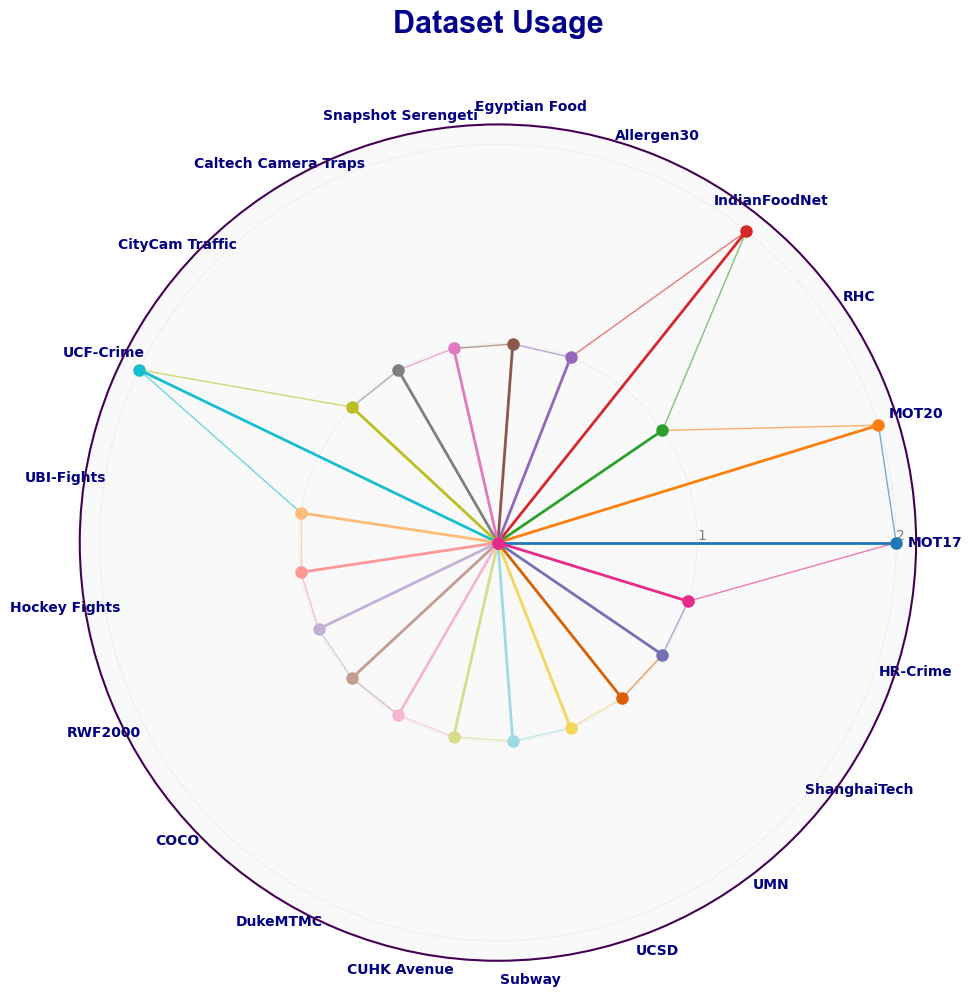

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the radar chart
datasets = [
    'MOT17', 'MOT20', 'RHC', 'IndianFoodNet', 'Allergen30', 
    'Egyptian Food', 'Snapshot Serengeti', 'Caltech Camera Traps', 
    'CityCam Traffic', 'UCF-Crime', 'UBI-Fights', 'Hockey Fights', 
    'RWF2000', 'COCO', 'DukeMTMC', 'CUHK Avenue', 
    'Subway', 'UCSD', 'UMN', 'ShanghaiTech', 'HR-Crime'
]

# Usage counts for datasets, ensure these fit the scale of 1-2
usage_counts = [2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Normalize usage counts to fit between 1 and 2
normalized_usage_counts = [1 + (usage - 1) * (1 / (max(usage_counts) - 1)) for usage in usage_counts]

# Create a radar chart
num_vars = len(datasets)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by appending the start to the end
normalized_usage_counts += normalized_usage_counts[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Define a distinct color palette for areas and pointers
area_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
               '#ffbb78', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', 
               '#dbdb8d', '#9edae5', '#f6d55c', '#d95f02', '#7570b3', 
               '#e7298a']

# Fill the area with colors
for i in range(num_vars):
    segment_angles = angles[i:i + 2] + [angles[i]]  # Close the loop
    segment_usage = normalized_usage_counts[i:i + 2] + [normalized_usage_counts[i]]
    ax.fill(segment_angles, segment_usage, color=area_colors[i % len(area_colors)], alpha=0.6)

# Fix the chart's x-ticks (dataset labels)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(datasets, fontsize=10, fontweight='bold', color='navy')

# Add y-ticks for usage values and gridlines
ax.set_yticks([1, 2])
ax.set_yticklabels(['1', '2'], color='grey', size=10)
ax.yaxis.grid(True, linestyle=':', color='lightgrey', alpha=0.7)  # Dotted gridlines for radial axis

# Title with enhanced styling
plt.title('Dataset Usage', size=22, color='darkblue', y=1.1, fontweight='bold', family='Arial')

# Set the background color of the plot
ax.set_facecolor('#f9f9f9')  # Light background for the radar chart

# Add a border around the radar chart with unique colors for each spine
spine_colors = plt.cm.viridis(np.linspace(0, 1, num_vars))

for i, spine in enumerate(ax.spines.values()):
    spine.set_visible(True)
    spine.set_color(spine_colors[i % len(spine_colors)])
    spine.set_linewidth(1.5)

# Draw multi-colored pointers
for i in range(num_vars):
    ax.plot([angles[i], angles[i]], [0, normalized_usage_counts[i]], 
            color=area_colors[i % len(area_colors)], linewidth=2, marker='o', markersize=8)

# Shadow effect for visual appeal
ax.set_rlabel_position(0)  # Position y-labels on the left
ax.yaxis.set_tick_params(labelsize=10)  # Size of y-tick labels

# Add radial gridlines with a shadow effect
ax.yaxis.grid(True, linestyle=':', color='lightgrey', alpha=0.7)
ax.xaxis.grid(False)  # Hide radial gridlines

# Aesthetic adjustments to spacing
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
import plotly.graph_objects as go

# Dataset and usage values for Sunburst Chart
dataset_labels = ['MOT17', 'MOT20', 'RHC', 'IndianFoodNet', 'Allergen30', 'Egyptian food', 
                  'Snapshot Serengeti', 'Caltech Camera Traps', 'CityCam Traffic', 'UCF-Crime', 
                  'UBI-Fights', 'Hockey Fights', 'RWF2000', 'COCO', 'DukeMTMC', 'CUHK Avenue', 
                  'Subway', 'UCSD', 'UMN', 'ShanghaiTech', 'HR-Crime']
usage_values = [2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Create a sunburst chart
fig = go.Figure(go.Sunburst(
    labels=dataset_labels,
    parents=[""] * len(dataset_labels),
    values=usage_values,
    branchvalues="total",
    hoverinfo="label+value+percent entry"))

# Update layout
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), title='Sunburst Chart of Dataset Usage in Project')

# Show plot
fig.show()

